In [1]:
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt

In [303]:
with open("/Users/tigrank/Dropbox/misc_programming/gallup/emotions.json", "r") as f:
    dataset = json.load(f)

In [304]:
name_changer = {
                'Hong Kong, S.A.R. of China': 'Hong Kong',
                "Lao People's Democratic Republic": 'Laos',
                'Moldova, Republic of': 'Moldova',
                'Netherlands (Kingdom of the)': 'Netherlands',
                'T&#252;rkiye': 'Turkiye',
                'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                'Taiwan, Province of China': 'Taiwan'
                }

def name_filter(array, dictionary):
    return [dictionary.get(name, name) for name in array]

In [305]:
keys     = list(dataset['qInfo'].keys())[1:]
emotions = [dataset['qInfo'][key]['label'] for key in keys]
emotions_dict = dict(np.array([emotions, keys]).T)
emotions_dict

{'Anger': 'q1',
 'Sadness': 'q2',
 'Stress': 'q3',
 'Worry': 'q4',
 'Pain': 'q5',
 'Enjoyment': 'q6',
 'Well-Rested': 'q7',
 'Learned': 'q8',
 'Smiled': 'q9',
 'Respect': 'q10'}

In [306]:
positive = ['no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes']
positive_dict = dict(np.array([emotions, positive]).T)
positive_dict

{'Anger': 'no',
 'Sadness': 'no',
 'Stress': 'no',
 'Worry': 'no',
 'Pain': 'no',
 'Enjoyment': 'yes',
 'Well-Rested': 'yes',
 'Learned': 'yes',
 'Smiled': 'yes',
 'Respect': 'yes'}

In [307]:
data          = []
country_names = []

for country_data in dataset["data"]:
    country_name     = country_data['name']
    country_names.append(country_name)
    country_emotions = [country_data[emotions_dict[emotion]][positive_dict[emotion]] for emotion in emotions_dict]
    data.extend([country_emotions])
    
country_names = name_filter(country_names, name_changer)

In [308]:
df = pd.DataFrame(data, columns=emotions, dtype=int)
df

,Anger,Sadness,Stress,Worry,Pain,Enjoyment,Well-Rested,Learned,Smiled,Respect
0,73,54,46,33,58,33,46,17,28,67
1,76,70,50,60,53,68,65,35,74,92
2,85,71,57,53,59,79,70,54,82,94
3,58,63,72,52,62,60,50,42,68,96
4,86,76,57,63,68,79,66,63,76,91
...,...,...,...,...,...,...,...,...,...,...
137,85,71,55,53,63,74,76,69,84,97
138,95,89,86,79,93,71,92,53,88,97
139,72,76,64,50,58,51,53,31,51,80
140,78,66,57,47,53,68,67,47,79,88


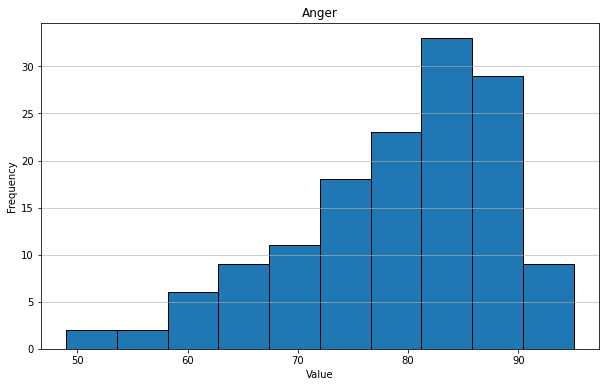

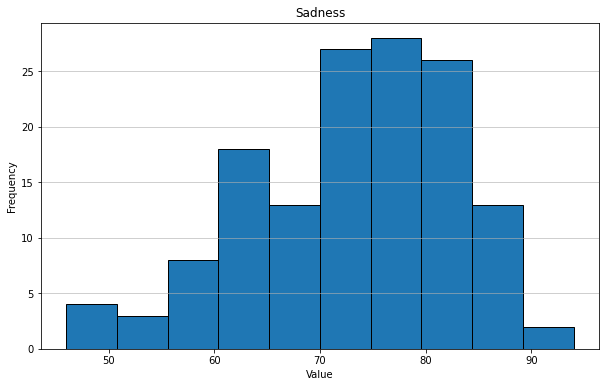

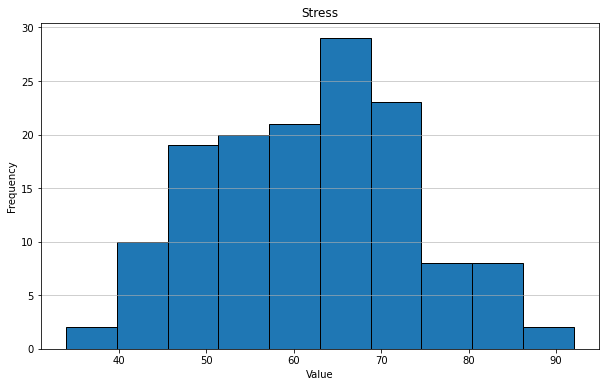

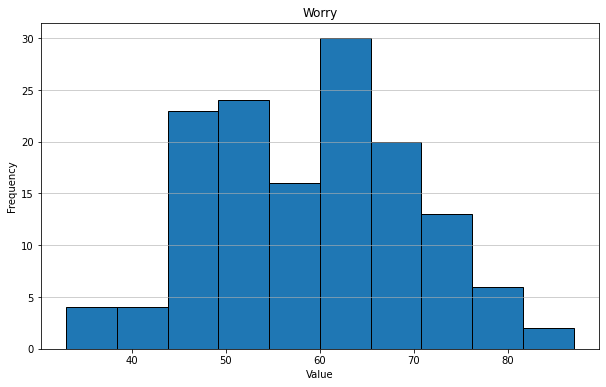

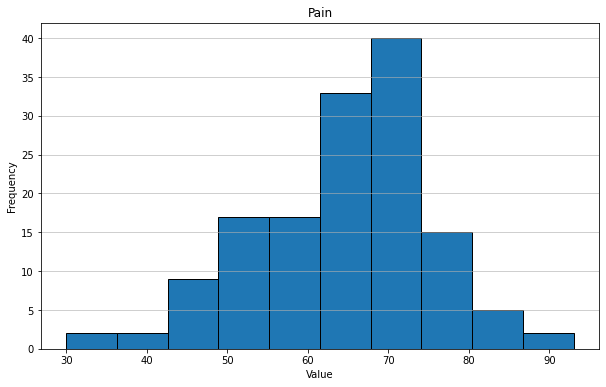

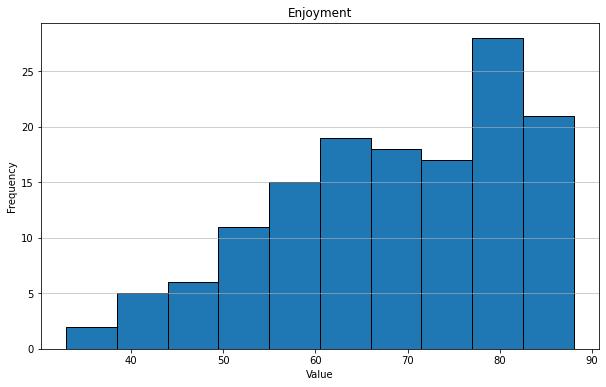

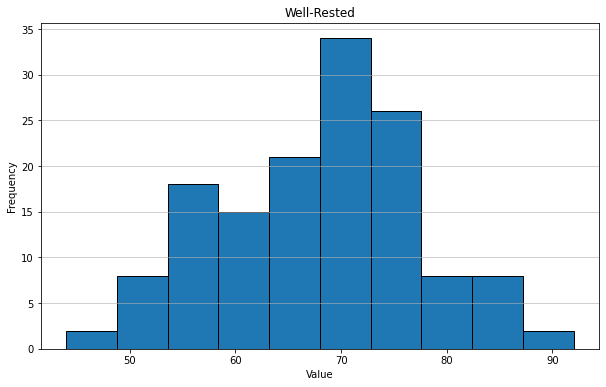

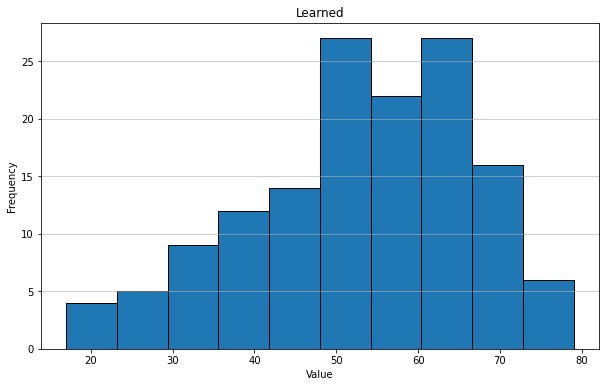

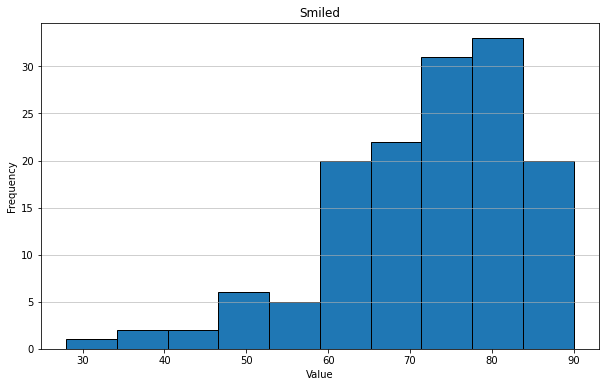

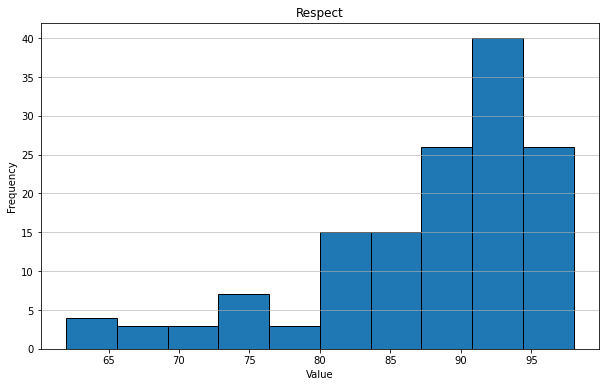

In [291]:
for emotion in emotions:
    emotion_number = int(emotions_dict[emotion][1:])-1
    numbers        = np.array(data).T[emotion_number].astype(int)
    plt.figure(figsize=(10, 6))
    plt.hist(numbers, bins=10, edgecolor='black')
    plt.title(emotion)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [309]:
def arr_to_ranks(arr, n_bins=10):
    # Create bins (you can adjust the number of bins as needed)
    bins = np.histogram_bin_edges(arr, n_bins)

    # Assign ranks based on bins
    ranks = np.digitize(arr, bins)
    ranks = np.minimum(ranks, n_bins)
    
    #ranks = np.quantile(arr, np.arange(0.1, 1.1, 0.1))
    
    return ranks

In [310]:
threshold = 8.0

In [311]:
df_result = pd.DataFrame(country_names, columns=["Country"])
for emotion in emotions:
    df_result[emotion] = arr_to_ranks(df[emotion].values)
    
df_result['Composite'] = df_result.mean(axis=1, numeric_only=True)
df_result              = df_result.sort_values(by='Composite', ascending=False)

In [312]:
df_result[df_result['Composite']>threshold]

,Country,Anger,Sadness,Stress,Worry,Pain,Enjoyment,Well-Rested,Learned,Smiled,Respect,Composite
138,Vietnam,10,9,9,9,10,7,10,6,10,10,9.0
76,Malaysia,8,8,9,9,8,10,10,6,10,10,8.8
136,Uzbekistan,7,8,10,9,8,10,9,7,9,10,8.7
123,Taiwan,9,10,6,10,9,10,7,7,9,8,8.5
100,Paraguay,9,8,6,6,7,10,9,9,10,10,8.4
54,Indonesia,7,6,9,6,8,10,9,9,10,9,8.3
66,Kyrgyzstan,8,9,10,8,9,9,8,4,9,9,8.3
36,Estonia,10,8,8,7,8,10,6,9,8,9,8.3
81,Mexico,10,7,5,6,7,10,8,9,10,10,8.2
65,Kuwait,8,9,6,7,7,8,9,8,9,10,8.1


In [459]:
df_result1 = pd.DataFrame(country_names, columns=["Country"])
for emotion in ['Anger', 'Stress', 'Worry', 'Enjoyment', 'Well-Rested', 'Learned']:
    df_result1[emotion] = df_result[emotion]
df_result1['Composite'] = df_result1.mean(axis=1, numeric_only=True)
df_result1              = df_result1.sort_values(by='Composite', ascending=False)

In [460]:
df_result1[df_result1['Composite']>threshold]

,Country,Anger,Stress,Worry,Enjoyment,Well-Rested,Learned,Composite
76,Malaysia,8,9,9,10,10,6,8.666667
136,Uzbekistan,7,10,9,10,9,7,8.666667
138,Vietnam,10,9,9,7,10,6,8.500000
54,Indonesia,7,9,6,10,9,9,8.333333
36,Estonia,10,8,7,10,6,9,8.333333
126,Thailand,8,7,7,9,8,10,8.166667
123,Taiwan,9,6,10,10,7,7,8.166667
100,Paraguay,9,6,6,10,9,9,8.166667
122,Switzerland,9,7,8,9,7,9,8.166667


In [461]:
df_result.sort_values(by='Composite', ascending=False).Country.values

array(['Vietnam', 'Malaysia', 'Uzbekistan', 'Taiwan', 'Paraguay',
       'Indonesia', 'Kyrgyzstan', 'Estonia', 'Mexico', 'Kuwait',
       'Switzerland', 'Panama', 'Thailand', 'Denmark', 'Finland',
       'Saudi Arabia', 'Kosovo', 'Kazakhstan', 'Singapore', 'Norway',
       'Sweden', 'Luxembourg', 'Netherlands', 'Costa Rica', 'Guatemala',
       'Chile', 'China', 'Iceland', 'Somalia', 'Austria', 'Tajikistan',
       'Germany', 'Ireland', 'Uruguay', 'Kenya', 'Mauritius', 'Belgium',
       'New Zealand', 'Honduras', 'Senegal', 'Czech Republic', 'France',
       'Colombia', 'Dominican Republic', 'Venezuela', 'Namibia',
       'Mongolia', 'United Kingdom', 'Poland', 'Russian Federation',
       'Australia', 'Hungary', 'Philippines', 'South Africa',
       'El Salvador', 'Nicaragua', 'Zimbabwe', 'Botswana', 'Slovakia',
       'Hong Kong', 'Slovenia', 'Tanzania', 'Latvia', 'Japan', 'Mali',
       'Argentina', 'Portugal', 'Brazil', 'Eswatini', 'Serbia', 'Italy',
       'Georgia', 'Moldova', 'N

**Weighted approach**

In [462]:
emotion_weights =   {'Anger':       1, 
                     'Sadness':     1.5,
                     'Stress':      1,
                     'Worry':       1,
                     'Pain':        1.5,
                     'Enjoyment':   1,
                     'Well-Rested': 1,
                     'Learned':     1,
                     'Smiled':      .5,
                     'Respect':     1
                    }

In [439]:
df_w = pd.DataFrame(country_names, columns=["Country"])
for emotion in emotions:
    df_w[emotion] = df_result[emotion]*emotion_weights[emotion]
df_w['Composite'] = df_w.mean(axis=1, numeric_only=True)
df_w              = df_w.sort_values(by='Composite', ascending=False)

In [440]:
df_w.Country.values

array(['Vietnam', 'Malaysia', 'Uzbekistan', 'Taiwan', 'Kyrgyzstan',
       'Estonia', 'Paraguay', 'Indonesia', 'Kuwait', 'Switzerland',
       'Mexico', 'Kazakhstan', 'Finland', 'Denmark', 'Thailand', 'Panama',
       'Singapore', 'China', 'Saudi Arabia', 'Kosovo', 'Sweden',
       'Luxembourg', 'Netherlands', 'Norway', 'Tajikistan', 'Austria',
       'Germany', 'Ireland', 'Somalia', 'Iceland', 'Poland', 'Mongolia',
       'Costa Rica', 'Chile', 'Mauritius', 'New Zealand', 'Kenya',
       'Guatemala', 'France', 'Hungary', 'Belgium', 'Russian Federation',
       'Czech Republic', 'Uruguay', 'Namibia', 'Honduras', 'Australia',
       'United Kingdom', 'Colombia', 'Hong Kong', 'Dominican Republic',
       'Senegal', 'South Africa', 'Venezuela', 'Philippines', 'Slovakia',
       'Slovenia', 'Japan', 'Zimbabwe', 'Serbia', 'El Salvador',
       'Botswana', 'Latvia', 'Nicaragua', 'Tanzania', 'Georgia',
       'Bosnia and Herzegovina', 'South Korea', 'Mali', 'Bulgaria',
       'Croatia', 'Mold

**Let's try to do deciles now**

In [327]:
dfq = pd.DataFrame(country_names, columns=['Country'])
for emotion in emotions:
    dfq[emotion] = pd.qcut(df[emotion], q=10, labels=False)
    
dfq['Composite'] = dfq.mean(axis=1, numeric_only=True)
dfq = dfq.sort_values(by='Composite', ascending=False)

In [418]:
dfq.head(12)

,Country,Anger,Sadness,Stress,Worry,Pain,Enjoyment,Well-Rested,Learned,Smiled,Respect,Composite
138,Vietnam,9,9,9,9,9,5,9,4,9,9,8.1
76,Malaysia,5,7,9,9,9,9,9,4,8,8,7.7
100,Paraguay,8,7,5,5,6,9,9,9,9,9,7.6
136,Uzbekistan,3,8,9,9,8,9,9,5,6,9,7.5
81,Mexico,9,6,4,5,6,9,9,8,9,9,7.4
99,Panama,8,5,4,4,7,9,9,9,9,9,7.3
36,Estonia,9,8,8,7,9,8,4,8,5,6,7.2
54,Indonesia,4,4,9,5,9,9,9,8,9,6,7.2
123,Taiwan,9,9,6,9,9,8,7,5,6,4,7.2
66,Kyrgyzstan,6,9,9,9,9,8,8,1,7,5,7.1


In [419]:
df_w.Country.values

array(['Vietnam', 'Taiwan', 'Malaysia', 'Uzbekistan', 'Kyrgyzstan',
       'Estonia', 'Kazakhstan', 'Paraguay', 'Kuwait', 'Finland',
       'Switzerland', 'Singapore', 'Indonesia', 'Denmark', 'Kosovo',
       'Mexico', 'Thailand', 'China', 'Saudi Arabia', 'Sweden', 'Panama',
       'Luxembourg', 'Poland', 'Netherlands', 'Mongolia', 'Tajikistan',
       'Mauritius', 'Norway', 'Austria', 'Somalia', 'Russian Federation',
       'Namibia', 'Germany', 'Iceland', 'Hungary', 'Hong Kong', 'Ireland',
       'Kenya', 'New Zealand', 'France', 'Chile', 'Costa Rica', 'Belgium',
       'Zimbabwe', 'Czech Republic', 'Japan', 'Australia', 'Uruguay',
       'Guatemala', 'Serbia', 'United Kingdom', 'Honduras', 'Slovenia',
       'Colombia', 'Dominican Republic', 'South Africa', 'Slovakia',
       'Botswana', 'Senegal', 'Georgia', 'Venezuela', 'Latvia',
       'Philippines', 'Bulgaria', 'Croatia', 'Bosnia and Herzegovina',
       'South Korea', 'Azerbaijan', 'Tanzania', 'El Salvador', 'Moldova',
       '

**Final comparison**

In [466]:
cut_off = 2

df_final = pd.DataFrame()
df_final['simple'] = df_result.Country.values[:cut_off]
df_final['selected'] = df_result1.Country.values[:cut_off]
df_final['weighted'] = df_w.Country.values[:cut_off]
df_final['deciles'] = dfq.Country.values[:cut_off]

df_final

,simple,selected,weighted,deciles
0,Vietnam,Malaysia,Vietnam,Vietnam
1,Malaysia,Uzbekistan,Malaysia,Malaysia


In [467]:
simple   = set(df_result.Country.values[:cut_off])
selected = set(df_result1.Country.values[:cut_off])
weighted = set(df_w.Country.values[:cut_off])
deciles  = set(dfq.Country.values[:cut_off])

simple & selected & weighted & deciles

{'Malaysia'}

In [468]:
', '.join(simple & selected & deciles)

'Malaysia'

In [2]:

import plotly.express as px
import pandas as pd

# Assuming your data is in a list of tuples (country_name, value)
data = [("United States", 100), ("Canada", 80), ("Mexico", 60), ("Brazil", 70)]

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data, columns=["country", "value"])

# Create the choropleth map
fig = px.choropleth(
    df,
    locations="country",
    color="value",
    hover_name="country",
    color_continuous_scale="Viridis",
    locationmode="country names",
    projection="natural earth"
)

# Update the layout
fig.update_layout(
    title="Choropleth Map",
    geo_scope="world",  # Set the scope to world
)

# Show the map
fig.show()

TypeError: __init__() got an unexpected keyword argument 'default'